# Credit Card Fraud Detection - Julia

* SMOTE is used for handle the extreme class imbalance.
* XGBoost is used for training the fraud detection classifier.
* Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

## Load Dataset

In [2]:
using CSV
using DataFrames


data_dir = "data/creditcard.csv"
df = DataFrame(CSV.File(data_dir))
println(size(df))

ENV["COLUMNS"] = 500
# first(df, 10)
# show(df[1:5, :], allcols = true)
df[1:5, :]

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,0.0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
2,0.0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
3,1.0,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
4,1.0,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
5,2.0,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [2]:
Base.displaysize() = (31, 31)
missing_vals = describe(df, :nmissing, length => :length)
missing_vals

,variable,nmissing,length
,Symbol,Int64,Int64
1,Time,0,284807
2,V1,0,284807
3,V2,0,284807
4,V3,0,284807
5,V4,0,284807
6,V5,0,284807
7,V6,0,284807
8,V7,0,284807
9,V8,0,284807


In [6]:
names(missing_vals)

3-element Vector{String}:
 "variable"
 "nmissing"
 "length"

In [23]:
using DataFrameMacros


@transform!(missing_vals, :pct_missing = divide(:nmissing, :length))

,variable,nmissing,length,pct_missing
,Symbol,Int64,Int64,Float64
1,Time,0,284807,0.0
2,V1,0,284807,0.0
3,V2,0,284807,0.0
4,V3,0,284807,0.0
5,V4,0,284807,0.0
6,V5,0,284807,0.0
7,V6,0,284807,0.0
8,V7,0,284807,0.0
9,V8,0,284807,0.0


In [25]:
combine(groupby(df, "Class"), nrow)

,Class,nrow
,Int64,Int64
1,0,284315
2,1,492


### Transaction amount & time

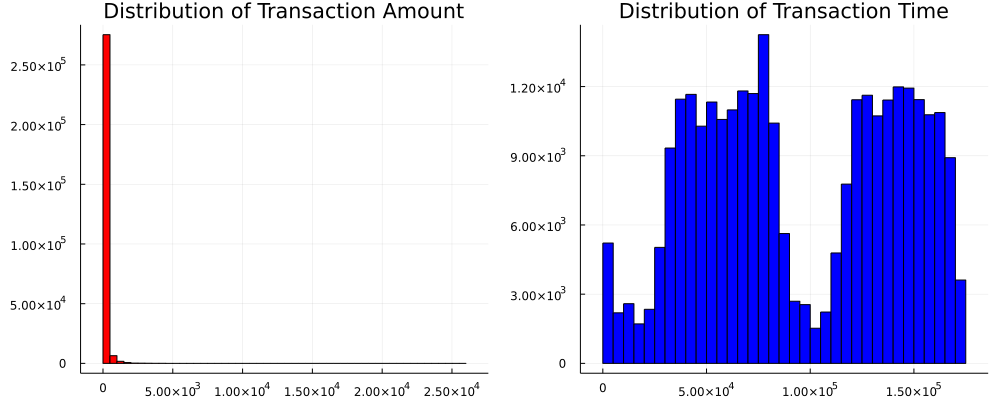

In [41]:
using StatsPlots


gr(size = (1000, 400))
p1 = histogram(
    df.Amount, bins=50, c=:red,
    title="Distribution of Transaction Amount",
    label="" # suppress showing the label
)
p2 = histogram(
    df.Time, bins=50, c=:blue,
    title="Distribution of Transaction Time",
    label="" # suppress showing the label
)
plot(p1, p2)

### Correlation matrix

In [23]:
fraud_df = df[df.Class .== 1, :]
non_fraud_df = df[df.Class .== 0, :]

println(size(fraud_df), size(non_fraud_df))

# Take a subsample of the non-fraud transactions
balanced_df = append!(fraud_df, first(non_fraud_df, nrow(fraud_df)))
println(size(balanced_df))

(492, 31)(284315, 31)
(984, 31)


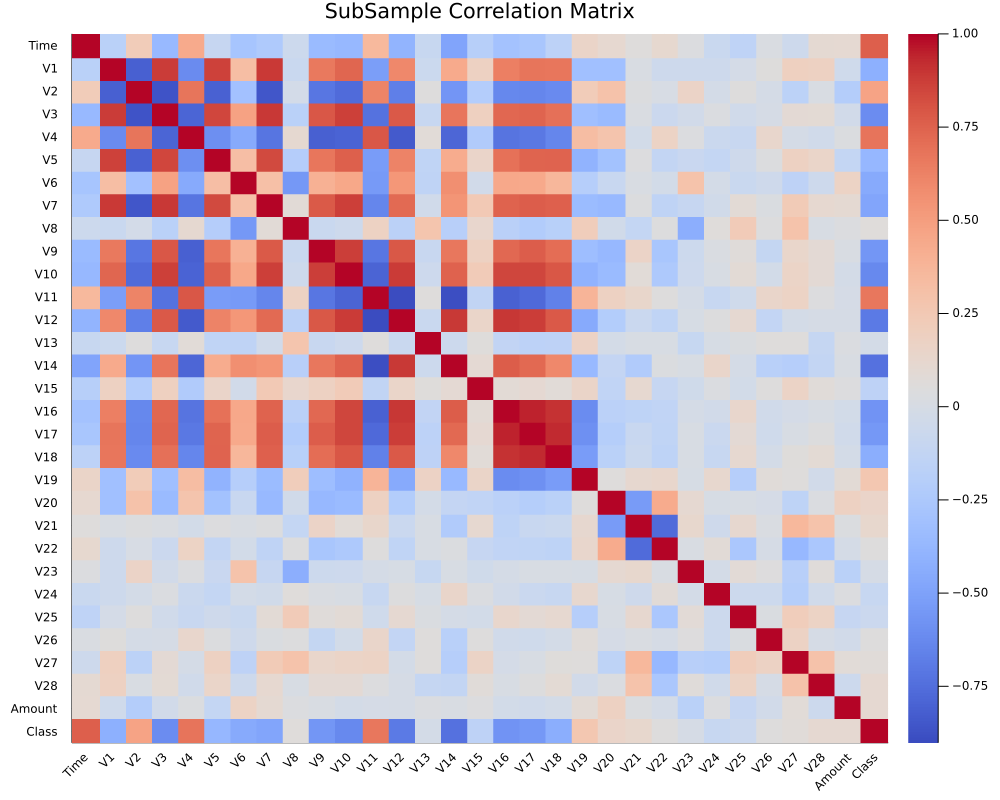

In [40]:
using Statistics
using Plots

M = cor(Matrix(balanced_df))

gr(size = (1000, 800))
heatmap(
    names(balanced_df), names(balanced_df), M,
    yflip=true, c=:coolwarm, ticks=:all, xrotation=45,
    title="SubSample Correlation Matrix"
)

### Positively correlated features

In [53]:
pos_features = select(balanced_df, :V2, :V4, :V11, :V19)
first(pos_features, 10)

,V2,V4,V11,V19
,Float64,Float64,Float64,Float64
1,1.95199,3.99791,3.20203,0.416956
2,-3.15731,2.28864,-0.414575,0.283345
3,1.75925,2.33024,2.03291,-1.33444
4,1.35837,2.67979,4.89584,0.308334
5,3.01974,4.7328,2.10134,-2.72185
6,4.13784,6.67573,5.66439,-1.93467
7,4.13246,6.34856,6.75463,-1.32736
8,3.71289,6.07827,4.56072,-2.3706
9,3.80908,6.04745,6.43905,-1.80801


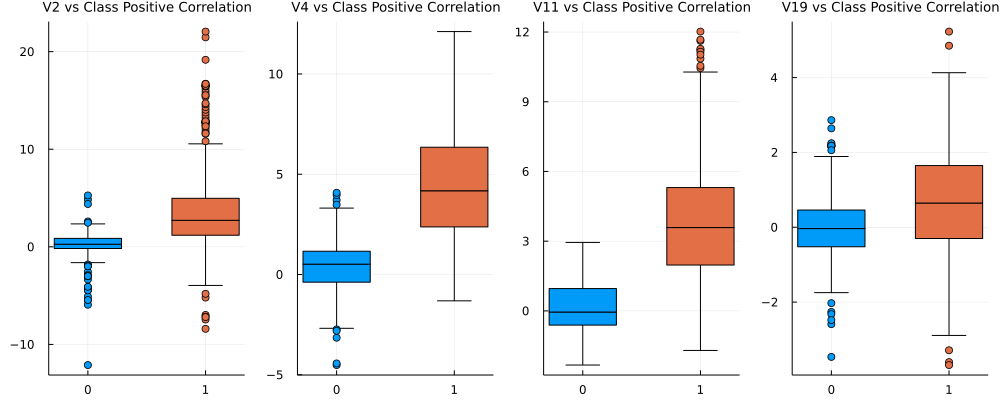

In [93]:
p1 = @df balanced_df boxplot(
    string.(:Class), :V2, label="", title="V2 vs Class Positive Correlation", group=(:Class)
)
p2 = @df balanced_df boxplot(
    string.(:Class), :V4, label="", title="V4 vs Class Positive Correlation", group=(:Class)
)
p3 = @df balanced_df boxplot(
    string.(:Class), :V11, label="", title="V11 vs Class Positive Correlation", group=(:Class)
)
p4 = @df balanced_df boxplot(
    string.(:Class), :V19, label="", title="V19 vs Class Positive Correlation", group=(:Class)
)

plot(p1, p2, p3, p4, layout = (1, 4), titlefontsize=9)

### Negatively correlated features

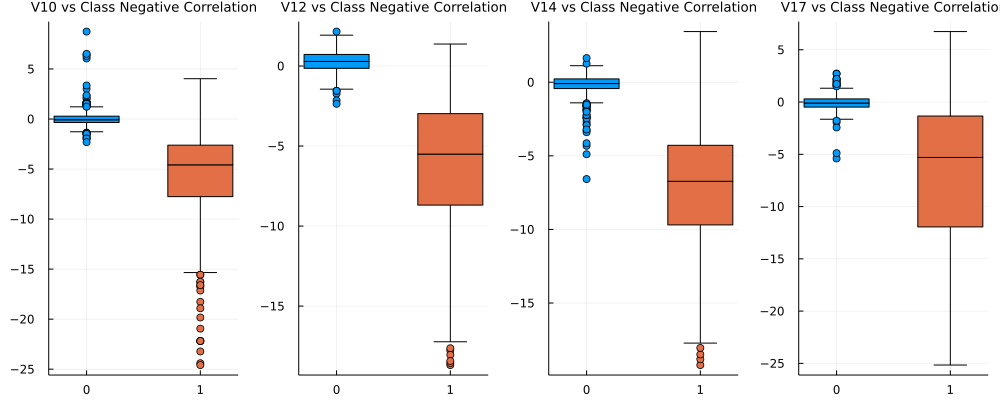

In [94]:
p1 = @df balanced_df boxplot(
    string.(:Class), :V10, label="", title="V10 vs Class Negative Correlation", group=(:Class)
)
p2 = @df balanced_df boxplot(
    string.(:Class), :V12, label="", title="V12 vs Class Negative Correlation", group=(:Class)
)
p3 = @df balanced_df boxplot(
    string.(:Class), :V14, label="", title="V14 vs Class Negative Correlation", group=(:Class)
)
p4 = @df balanced_df boxplot(
    string.(:Class), :V17, label="", title="V17 vs Class Negative Correlation", group=(:Class)
)

plot(p1, p2, p3, p4, layout = (1, 4), titlefontsize=9)

## Model Training

### Split data

In [117]:
# Convert dataframe to arrays
X = Array(df[!, Not(r"Class")])
X = transpose(X)
y = Array{Int64}(select(df, :Class))
y = vec(y)

size(X), size(y)

((30, 284807), (284807,))

In [119]:
using MLDataUtils
using Random

Random.seed!(42);
(X_train, y_train), (X_test, y_test) = stratifiedobs((X, y), p = 0.7)

println(size(X_train))
println(size(X_test))
println(size(y_train))
println(size(y_test))

(30, 199364)
(30, 85443)
(199364,)
(85443,)


### Scale features

## References

* Installing Julia on Ubuntu
https://medium.com/coffee-in-a-klein-bottle/install-julia-1-5-on-ubuntu-bb8be4b2571d

* [Solved] jupyter-lab: command not found on Ubuntu
https://ashley-tharp.medium.com/solved-jupyter-lab-command-not-found-on-ubuntu-820d5e97510d